In [1]:
import pystan as ps
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt


# used to force examples to run from local copy, rather than installed copy
import os, sys; sys.path.insert(0, os.path.abspath('../'))
import btom as bt

In [4]:
meas_ops = (bt.pauli_basis()[1:] + np.eye(2)) / 2
psi = np.array([[1],[1]])/np.sqrt(2)
rho = np.dot(psi, psi.conj().T)
bt.BinomialTomographyData.simulate(rho, meas_ops, 5)

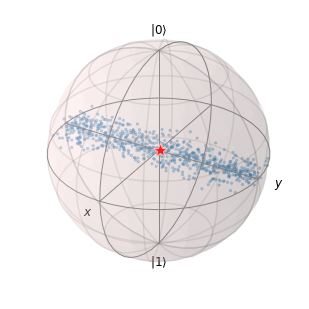

In [18]:
psi = np.array([[1],[-1j]])/np.sqrt(2)
rho = np.dot(psi, psi.conj().T)

sampler = bt.BinomialGinibreStateSampler(ginibre_dim=2)
meas_ops = (bt.pauli_basis()[1:] + np.eye(2)) / 2
data = bt.BinomialTomographyData.simulate(rho, meas_ops, [50,0,1000])
pos = bt.StatePosterior(sampler, data)
pos.bloch_plot()

In [35]:
m = bt.utils.StanModelFactory.load_builtin('ginibre-prior-real.stan').model

samples = m.sampling({'D':5, 'K': 1}, chains=4)

(array([849., 366., 221., 196., 192., 160., 133., 130., 112., 129.,  79.,
        106.,  83.,  86.,  78.,  76.,  81.,  56.,  62.,  66.,  49.,  50.,
         48.,  59.,  50.,  41.,  44.,  33.,  42.,  26.,  28.,  27.,  28.,
         19.,  22.,  17.,  21.,  19.,  22.,  15.,  15.,  14.,  18.,   9.,
          6.,   5.,   4.,   4.,   2.,   2.]),
 array([7.77240697e-08, 1.99062820e-02, 3.98124863e-02, 5.97186905e-02,
        7.96248948e-02, 9.95310991e-02, 1.19437303e-01, 1.39343508e-01,
        1.59249712e-01, 1.79155916e-01, 1.99062120e-01, 2.18968325e-01,
        2.38874529e-01, 2.58780733e-01, 2.78686938e-01, 2.98593142e-01,
        3.18499346e-01, 3.38405550e-01, 3.58311755e-01, 3.78217959e-01,
        3.98124163e-01, 4.18030367e-01, 4.37936572e-01, 4.57842776e-01,
        4.77748980e-01, 4.97655184e-01, 5.17561389e-01, 5.37467593e-01,
        5.57373797e-01, 5.77280002e-01, 5.97186206e-01, 6.17092410e-01,
        6.36998614e-01, 6.56904819e-01, 6.76811023e-01, 6.96717227e-01,
        7.

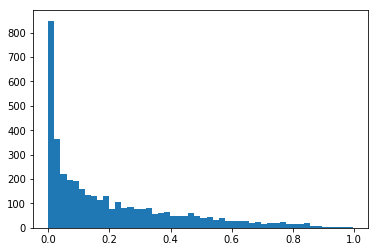

In [36]:
plt.hist(samples['rho'][:,0,0], 50)

In [13]:
meas_ops.dagger().dot(rho).trace()

array([1. +0.j, 0.5+0.j, 0.5+0.j])

In [3]:
%debug

> /home/ihincks/academics/research/projects/btom/btom/data.py(163)simulate()
    161         probs = StateTomographyData._measurement_results(meas_ops, true_state)
    162         if not np.allclose(np.imag(probs), 0):
--> 163             raise ValueError(('Some probabilities imaginary; check that'
    164                 'your measurements and state are positive semi-definite and '
    165                 'less than the identity'))

ipdb> probs
array([0.5+0.j , 0. +0.5j, 0. +0.j ])
ipdb> np.imag(probs)
array([0. , 0.5, 0. ])
ipdb> exit


In [4]:
def _set_labels(ax, labels, d='x'):
    if d == 'x':
        ax.get_xaxis().set_tick_params(direction='out')
        ax.xaxis.set_ticks_position('bottom')
        ax.set_xticks(np.arange(1, len(labels) + 1))
        ax.set_xticklabels(labels)
        ax.set_xlim(0.25, len(labels) + 0.75)
    elif d == 'y':
        ax.get_yaxis().set_tick_params(direction='out')
        ax.yaxis.set_ticks_position('bottom')
        ax.set_yticks(np.arange(1, len(labels) + 1))
        ax.set_yticklabels(labels)
        ax.set_ylim(0.25, len(labels) + 0.75)

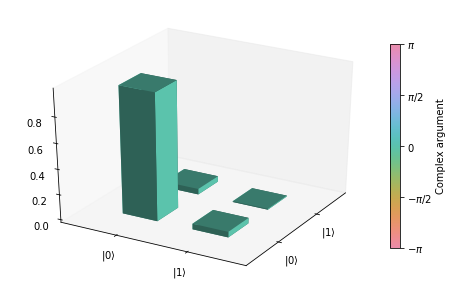

In [5]:
b = bt.canonical_basis(2)
bm = b.outer_product()
#pos._samples = np.array([[[1, 1j],[0.5 * 1j, 4 * np.exp(1j * np.pi)]]])
coeffs = bm.expansion(pos.states)
coeffs.shape

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.colors as col
import matplotlib as mpl

# setup the figure and axes
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111, projection='3d')

# fake data
x = np.tile(np.arange(b.n_arrays),b.n_arrays) + 0.75
y = (np.arange(b.n_arrays)).repeat(b.n_arrays) + 0.75

top = np.mean(np.abs(coeffs), axis=1)
arg = np.mean(np.angle(coeffs), axis=1)
colors = bt.utils.complex_cmap(0.5 * (arg + np.pi) / np.pi)
bottom = np.zeros_like(top)
width = depth = 1


ax1.bar3d(x, y, bottom, 0.5, 0.5, top, shade=True, color=colors)

zaxis = ax1.zaxis
#draw_grid_old = zaxis.axes._draw_grid
# disable draw grid
zaxis.axes._draw_grid = False

tmp_planes = zaxis._PLANES

# draw zaxis on the left side
zaxis._PLANES = (tmp_planes[2], tmp_planes[3],
                 tmp_planes[0], tmp_planes[1],
                 tmp_planes[4], tmp_planes[5])

#olourMap = plt.cm.ScalarMappable(cmap=bt.utils.complex_cmap, norm=col.Normalize(-np.pi, np.pi))
#olourMap.set_array(arg)
#olBar = plt.colorbar(colourMap, ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi]).set_label('Argument')
#colBar.set_labels((r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'))
cax, kw = mpl.colorbar.make_axes(ax1, shrink=.75, pad=.0)
cb = mpl.colorbar.ColorbarBase(cax, cmap=bt.utils.complex_cmap, norm=col.Normalize(-np.pi, np.pi), label='Complex argument')
cb.set_ticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
cb.set_ticklabels((r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'))


_set_labels(ax1, ['$' + name + '$' for name in b.names], 'x')
_set_labels(ax1, ['$' + name + '$' for name in b.names], 'y')

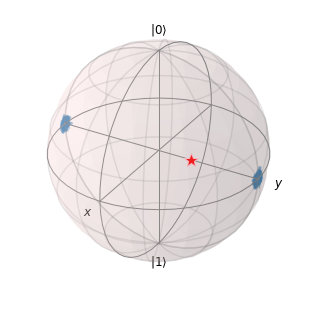

In [3]:
sampler = bt.BinomialGinibreStateSampler(ginibre_dim=1)
meas_ops = (bt.pauli_basis()[1:] + np.eye(2)) / 2
data = bt.BinomialTomographyData(meas_ops, [1000,0,1000], [500,0,500])
pos = bt.StatePosterior(sampler, data)
a = pos.bloch_plot()

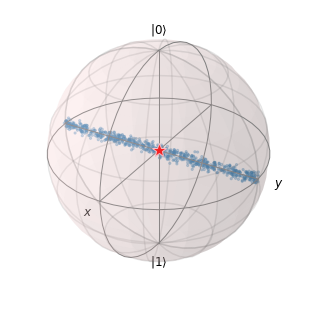

In [5]:
sampler = bt.BinomialGinibreStateSampler(ginibre_dim=2)
meas_ops = (bt.pauli_basis()[1:] + np.eye(2)) / 2
data = bt.BinomialTomographyData(meas_ops, [5000,0,1000], [2500,0,500])
pos = bt.StatePosterior(sampler, data)
a = pos.bloch_plot()